[*********************100%%**********************]  1 of 1 completed


(array([19601., 19631., 19662., 19692., 19723., 19754., 19783., 19814.,
        19844., 19875.]),
 [Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11'),
  Text(19692.0, 0, '2023-12'),
  Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02'),
  Text(19783.0, 0, '2024-03'),
  Text(19814.0, 0, '2024-04'),
  Text(19844.0, 0, '2024-05'),
  Text(19875.0, 0, '2024-06')])

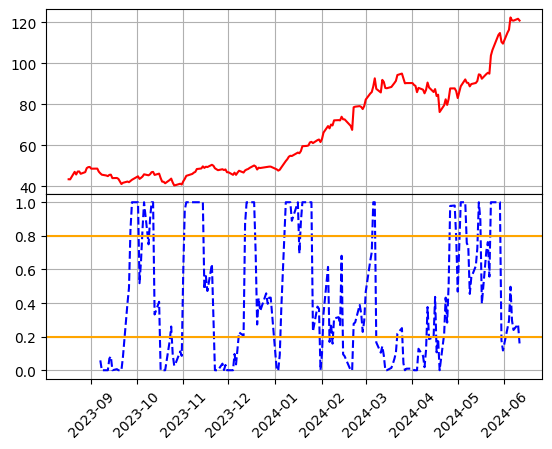

In [28]:
#This program uses the stochatic relative Strength Index (RSI) to determine if a stock is over bought or over sold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def get_stock_data(ticker: str, days: int) -> pd.DataFrame:
    """
    Fetches the Open, High, Low, Close, Adjusted Close, and Volume data for a given stock ticker and number of days.

    :param ticker: The stock ticker symbol.
    :param days: The number of days of historical data to fetch.
    :return: A pandas DataFrame containing the stock data.
    """
    # Calculate the start date based on the number of days
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch the data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data

# Example usage
ticker = "NVDA"
days = 300
df = get_stock_data(ticker, days)

#Create an exponential Moving Average Indicator functino

def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

#create a function to calculate the Stochastic Realative Strength Index
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS= AVG_Gain/AVG_Loss
    RSI = 100.0/(100.0/(1.0+RS))

    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    return stockrsi

#store the stochatic RSI data in new column
df['StochRSI'] = StochRSI(df)

#plot data
# create a figure and subplot
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)
ax1.grid()
ax2.grid()
#plot the closed price
ax1.plot(df.index, df['Close'], color = 'r') 
#plot the stochRSI
ax2.plot(df.index, df['StochRSI'], color = 'b', linestyle='--')
#plot oversold and overbough
ax2.axhline(0.20, color='orange')
ax2.axhline(0.80, color='orange')
plt.xticks(rotation=45)

In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_stock_data(ticker: str, days: int) -> pd.DataFrame:
    """
    Fetches the Open, High, Low, Close, Adjusted Close, and Volume data for a given stock ticker and number of days.

    :param ticker: The stock ticker symbol.
    :param days: The number of days of historical data to fetch.
    :return: A pandas DataFrame containing the stock data.
    """
    # Calculate the start date based on the number of days
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch the data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data

# Example usage
ticker = "NVDA"
days = 300
df = get_stock_data(ticker, days)

# Create an exponential Moving Average Indicator function
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS= AVG_Gain/AVG_Loss
    RSI = 100.0/(100.0/(1.0+RS))

    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    return stockrsi

# Store the Stochastic RSI data in a new column
df['StochRSI'] = StochRSI(df)

# Create a figure and subplot using Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Plot the closing price
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close', line=dict(color='red')), row=1, col=1)

# Plot the Stochastic RSI
fig.add_trace(go.Scatter(x=df.index, y=df['StochRSI'], mode='lines', name='StochRSI', line=dict(color='blue', dash='dash')), row=2, col=1)

# Add oversold and overbought lines
fig.add_hline(y=0.20, line=dict(color='orange'), row=2, col=1)
fig.add_hline(y=0.80, line=dict(color='orange'), row=2, col=1)

# Update layout
fig.update_layout(
    title=f'Stock Data and Stochastic RSI for {ticker}',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    height=800,
    width=1200,
    plot_bgcolor='lightgrey',
    paper_bgcolor='grey',
    font=dict(color='white')
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45, row=2, col=1)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed
